In [93]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/datathon-2024/sample_submission.csv
/kaggle/input/datathon-2024/test_x.csv
/kaggle/input/datathon-2024/train.csv


In [94]:
df_train = pd.read_csv('/kaggle/input/datathon-2024/train.csv')
df_test = pd.read_csv('/kaggle/input/datathon-2024/test_x.csv')

/tmp/ipykernel_36/1739310733.py:1: DtypeWarning: Columns (13,15,19,30,32,37,41,42) have mixed types. Specify dtype option on import or set low_memory=False.


# **Veri Analizi**

In [95]:
df = pd.concat([df_test.assign(ind="test"), df_train.assign(ind="train")])

In [96]:
#dikkat! df.count() sadece eksik olmayan (null olmayan) değerleri sayar.
#Percentage of missing values = (Number of missing values / Total number of values) * 100
missing_values = df.isnull().sum()
total_values = len(df)
missing_rate = (missing_values/total_values)*100
missing_rate

Basvuru Yili                                                  0.000000
Cinsiyet                                                      0.221860
Dogum Tarihi                                                  0.232363
Dogum Yeri                                                    1.038412
Ikametgah Sehri                                               2.674141
Universite Adi                                                0.173287
Universite Turu                                               0.334760
Burslu ise Burs Yuzdesi                                      70.541130
Burs Aliyor mu?                                               0.000000
Bölüm                                                         0.303253
Universite Kacinci Sinif                                      0.490981
Universite Not Ortalamasi                                     3.614094
Daha Once Baska Bir Universiteden Mezun Olmus                63.530864
Lise Adi                                                      0.504109
Lise A

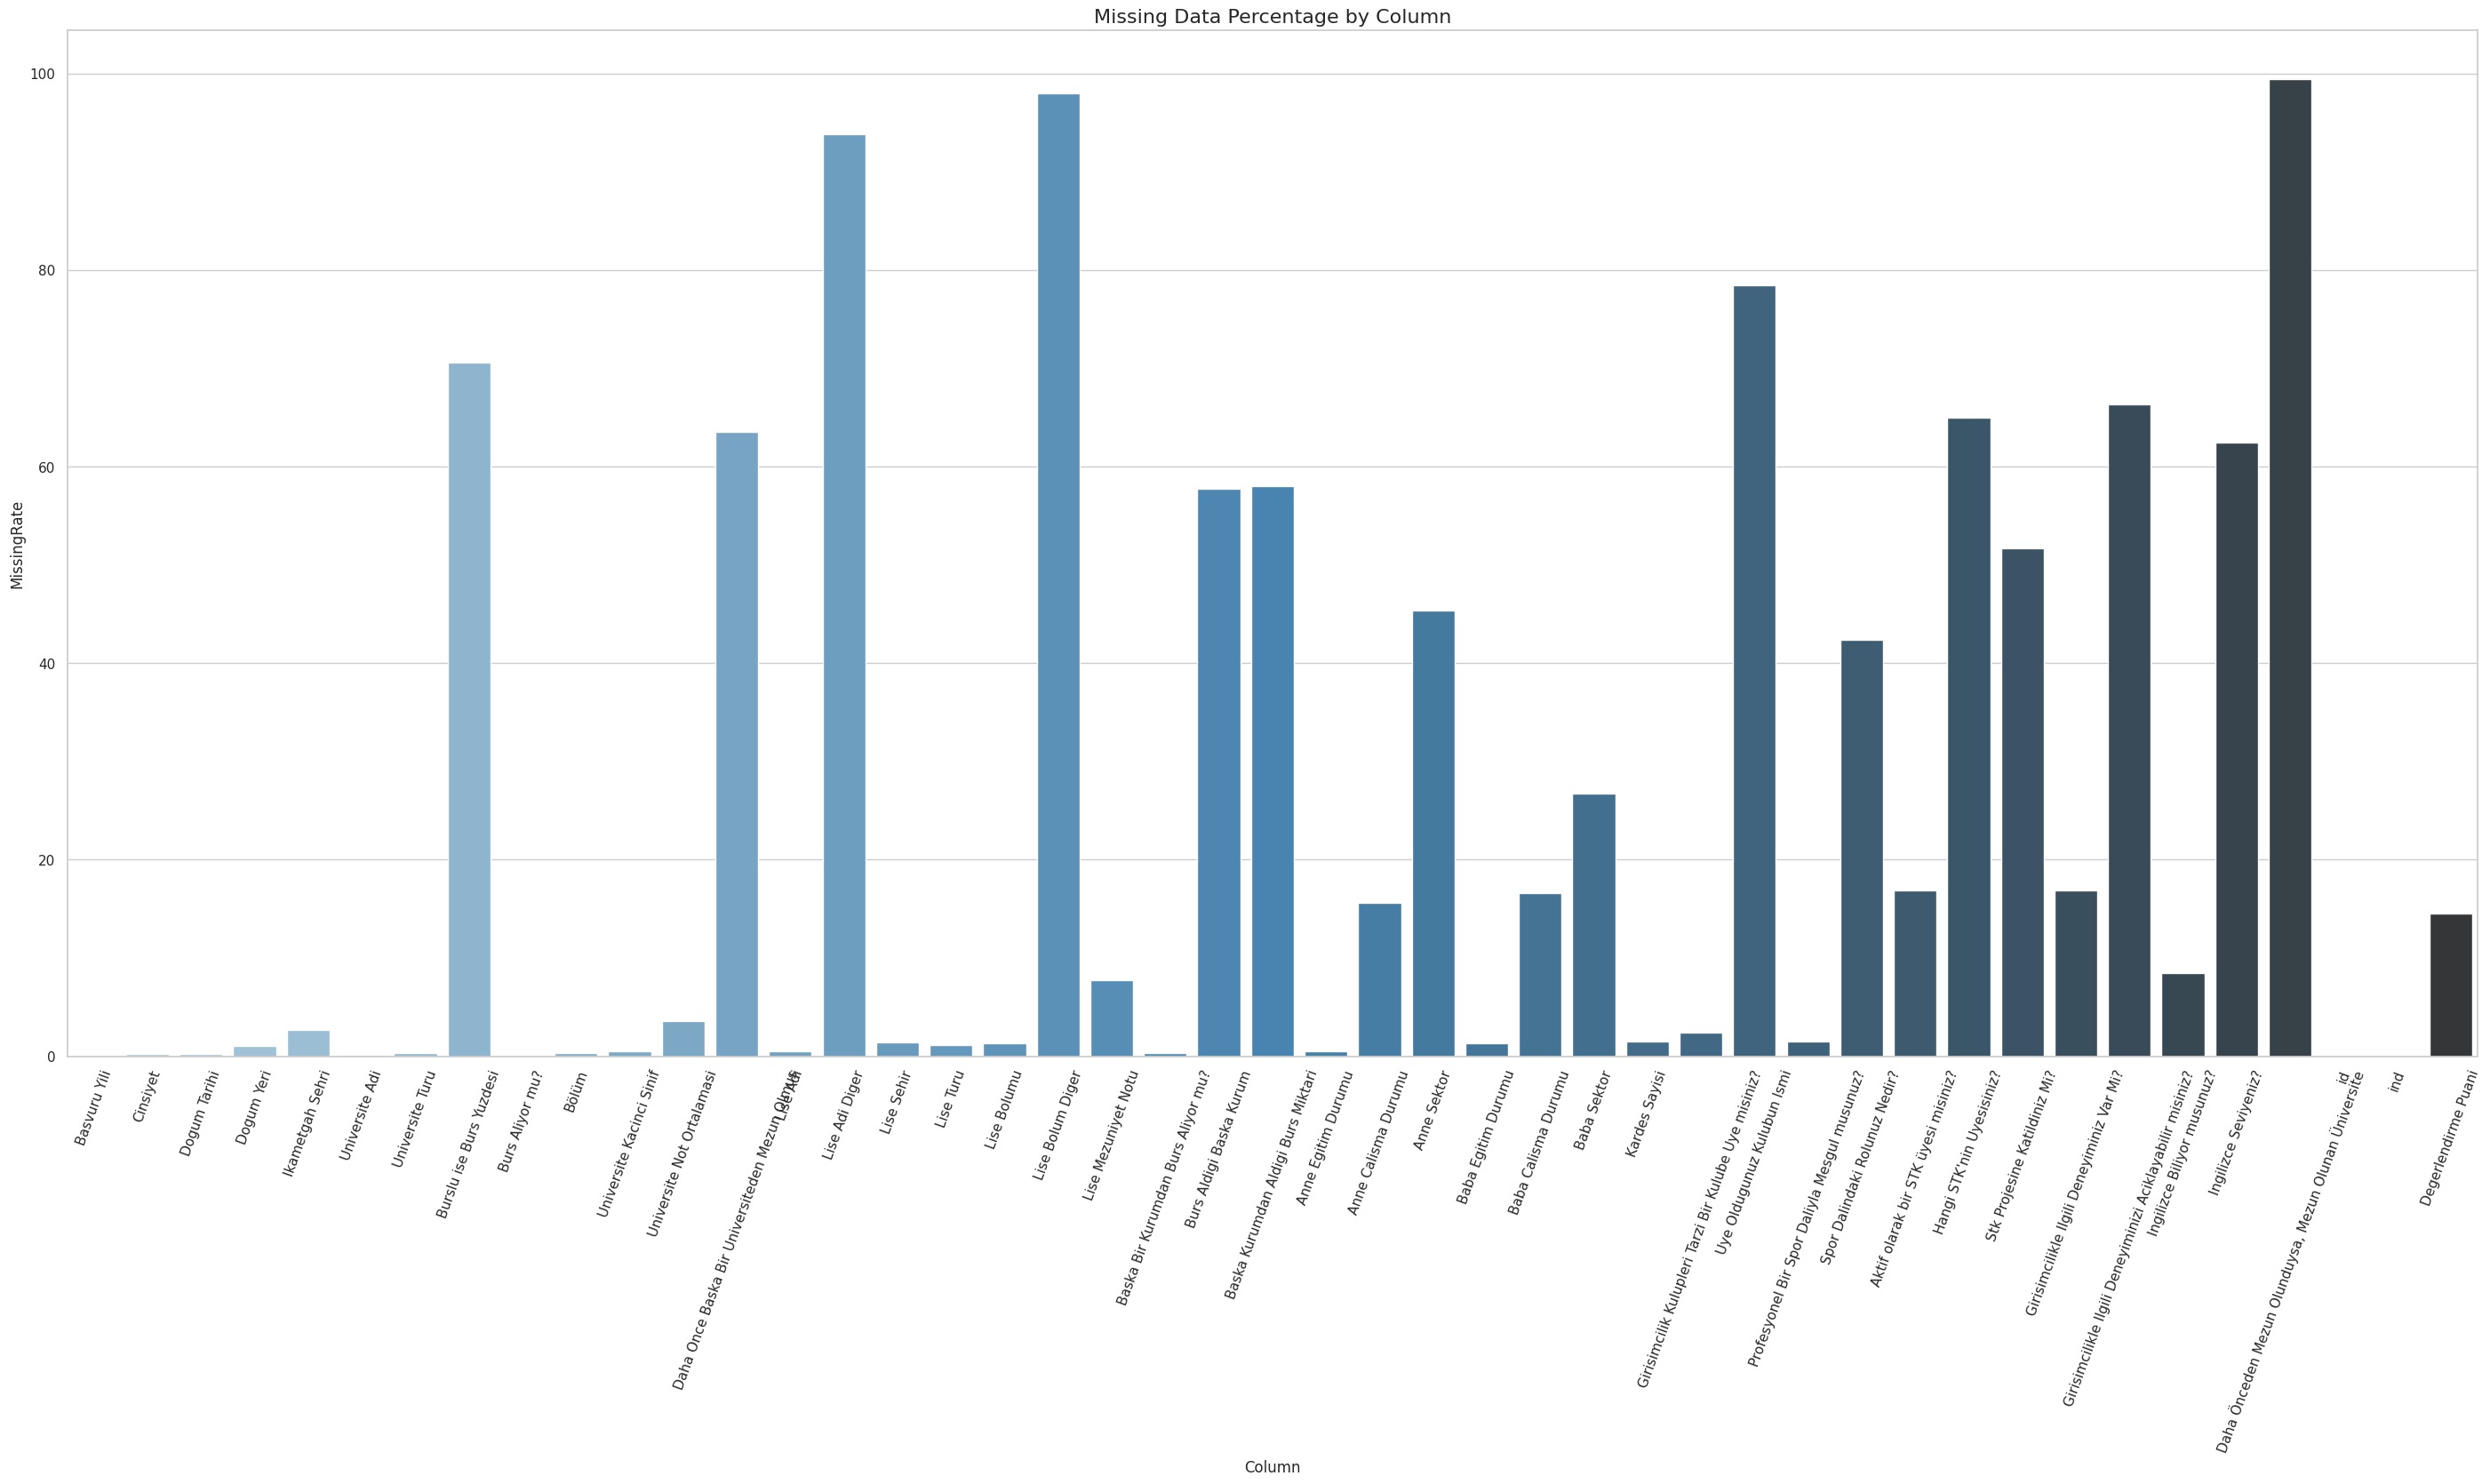

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

#veriyi barplot için uygun hale getirme
missing_df = missing_rate.reset_index()
missing_df.columns = ['Column', 'MissingRate']

plt.rcParams["figure.figsize"] = 35, 15
sns.set_theme(style="whitegrid")
sns.barplot(data=missing_df, x="Column", y="MissingRate", palette="Blues_d")

# Grafiği gösterme
plt.xticks(rotation=70)
plt.title("Missing Data Percentage by Column", fontsize=16)
plt.show()

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76174 entries, 0 to 65124
Data columns (total 45 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Basvuru Yili                                               76174 non-null  int64  
 1   Cinsiyet                                                   76005 non-null  object 
 2   Dogum Tarihi                                               75997 non-null  object 
 3   Dogum Yeri                                                 75383 non-null  object 
 4   Ikametgah Sehri                                            74137 non-null  object 
 5   Universite Adi                                             76042 non-null  object 
 6   Universite Turu                                            75919 non-null  object 
 7   Burslu ise Burs Yuzdesi                                    22440 non-null  float64
 8   Burs Aliyor

In [99]:
df['Cinsiyet'].unique()

array(['Kadın', 'Erkek', 'Belirtmek istemiyorum', 'ERKEK', nan],
      dtype=object)

In [100]:
df['Basvuru Yili'].unique()

array([2023, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])

In [101]:
print(df['Dogum Tarihi'].dtype)  # Veri tipini kontrol etme
df['Dogum Tarihi'].iloc[0]  # İlk satırdaki tarihi görüntüler
df['Dogum Tarihi'] = pd.to_datetime(df['Dogum Tarihi'], errors='coerce')

object


/tmp/ipykernel_36/1636834343.py:3: UserWarning: Parsing dates in %d.%m.%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.


# **Veri Ön İşleme**

In [102]:
df.shape[0]

76174

In [103]:
df["Cinsiyet"] = df["Cinsiyet"].str.lower()

In [104]:
print(df['Dogum Tarihi'].dtype) 
df['Dogum Tarihi'].iloc[0]

datetime64[ns]


Timestamp('2002-06-21 00:00:00')

In [105]:
df['Dogum Yili'] = df['Dogum Tarihi'].dt.year

In [106]:
df['Yas'] = df['Basvuru Yili'] - df['Dogum Yili']

In [107]:
median_age = df['Yas'].median()
df['Yas'].fillna(median_age, inplace=True)

/tmp/ipykernel_36/740312416.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.




In [108]:
valid_age_range = (0, 120)
df['Yas'] = df['Yas'].apply(lambda x: x if valid_age_range[0] <= x <= valid_age_range[1] else median_age)

In [109]:
df['Yas'].dtype
df['Yas'].unique()

array([21., 19., 20., 22., 23., 24., 25., 18., 17.])

# **Droplanan Columnlar**

In [110]:
df.drop(['Dogum Tarihi','Dogum Yeri','Dogum Yili',
    'Daha Once Baska Bir Universiteden Mezun Olmus','Anne Sektor',
    'Baba Sektor','Uye Oldugunuz Kulubun Ismi','Hangi STK\'nin Uyesisiniz?',
    'Daha Önceden Mezun Olunduysa, Mezun Olunan Üniversite'],axis=1,inplace=True)

In [111]:
df.drop(['Burs Aldigi Baska Kurum','Baska Kurumdan Aldigi Burs Miktari',
         'Baska Bir Kurumdan Burs Aliyor mu?'],axis=1,inplace=True)

In [112]:
df.drop(['Lise Adi Diger', 'Lise Bolum Diger'],axis=1,inplace=True)

# **Cinsiyet Columnu**

In [113]:
def cinsiyet_duzenle(gender):
    if str(gender).lower() == "kadın":
        return 1
    elif str(gender).lower() == "erkek":
        return 2
    else:
        return 0

df["Cinsiyet"] = df["Cinsiyet"].apply(cinsiyet_duzenle)

# **Şehir Columnu**

In [114]:
sehirler = [
    'adana', 'adıyaman', 'afyonkarahisar', 'ağrı', 'amasya', 'ankara', 
    'antalya', 'artvin', 'aydin', 'balıkesir', 'bartın', 'batman', 
    'bilecik', 'bingöl', 'bitlis', 'bolu', 'burdur', 'bursa', 
    'çanakkale', 'çankırı', 'çorum', 'denizli', 'diyarbakır', 'düzce', 
    'edremit', 'elazığ', 'erzincan', 'erzurum', 'eskişehir', 'gaziantep', 
    'giresun', 'gümüşhane', 'hakkari', 'hatay', 'ığdır', 'ısparta', 
    'istanbul', 'izmir', 'kahramanmaraş', 'karaman', 'kars', 'kastamonu', 
    'kayseri', 'kilis', 'kırıkkale', 'kırklareli', 'kırşehir', 'kocaeli', 
    'konya', 'kütahya', 'malatya', 'manisa', 'mardin', 'mersin', 
    'muğla', 'muş', 'nevşehir', 'niğde', 'ordu', 'osmaniye', 
    'rize', 'sakarya', 'samsun', 'sanlıurfa', 'siirt', 'sivas', 
    'şanlıurfa', 'şırnak', 'tekirdağ', 'tokat', 'trabzon', 'tunceli', 
    'uşak', 'van', 'yozgat', 'zonguldak'
]

def sehir_duzenle(sehir, sehirler):
    if pd.isna(sehir):
        return 'Bilinmiyor'
    sehir = sehir.lower().strip()
    for s in sehirler:
        if s in sehir:
            return s
    return 'Bilinmiyor'

df['Ikametgah Sehri'] = df['Ikametgah Sehri'].apply(sehir_duzenle, sehirler=sehirler)
df_test['Ikametgah Sehri'] = df_test['Ikametgah Sehri'].apply(sehir_duzenle, sehirler=sehirler)

# **Üniversite Columnu**

In [115]:
tr_map = {
    "ü": "u",
    "ö": "o",
    "ç": "c",
    "ş": "s",
    "ğ": "g",
    "ı": "i",
    "i̇": "i", 
}

In [116]:
df["Universite Adi"] = df["Universite Adi"].fillna("diger").str.lower()

df["Universite Adi"] = df["Universite Adi"].replace(tr_map, regex=True)

df["Universite Adi"] = df["Universite Adi"].str.strip()
df["Universite Adi"] = df["Universite Adi"].str.rstrip('- ')

In [117]:
uniler = ['özel', 'devlet']

def uni_duzenle(uni, uniler):
    if pd.isna(uni):
        return 'None'
    uni = uni.lower().strip()
    return next((u for u in uniler if u in uni), 'None')

df['Universite Turu'] = df['Universite Turu'].apply(uni_duzenle, uniler=uniler)
df_test['Universite Turu'] = df_test['Universite Turu'].apply(uni_duzenle, uniler=uniler)

In [118]:
df["Bölüm"] = df["Bölüm"].fillna("diğer")

In [119]:
sınıf_map = {
    0 : 0,
    "Hazırlık" : 1,
    "hazırlık" : 1,
    "1" : 2,
    "2" : 3,
    "3" : 4,
    "4" : 5,
    "5" : 6,
    "6" : 7, 
    "Mezun" : 8,
    "Tez" : 9,
    "Yüksek Lisans" : 10
}

df["Universite Kacinci Sinif"] = df["Universite Kacinci Sinif"].fillna(0)

df["Universite Kacinci Sinif"]= df["Universite Kacinci Sinif"].replace(sınıf_map)

In [120]:
df["Universite Kacinci Sinif"] = df["Universite Kacinci Sinif"].astype('int64')

In [121]:
uni_not_mapping = {'ORTALAMA BULUNMUYOR': 0, 'Not ortalaması yok': 0, 'Ortalama bulunmuyor': 0,'Hazırlığım': 0,
                   '0 - 1.79': 0,'1.00 - 2.50':1,'1.80 - 2.49':1,'2.50 ve altı':1,'2.00 - 2.50':1,"3.00-2.50":2,
                   "2.50 - 3.00":2,"2.50 - 2.99":2,'2.50 -3.00':2,'3.00 - 3.50':3,'3.50-3':3,'3.00 - 3.49':3,'3.00 - 4.00':3,'3.50 - 4.00':4,'4-3.5':4,'4.0-3.5':4}

df["Universite Not Ortalamasi"]= df["Universite Not Ortalamasi"].replace(uni_not_mapping)

df["Universite Not Ortalamasi"]= df["Universite Not Ortalamasi"].fillna(0)

/tmp/ipykernel_36/1538525898.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


# **Lise Columnu**

In [122]:
df["Lise Adi"] = df["Lise Adi"].str.lower().replace(tr_map)
df["Lise Adi"] = df["Lise Adi"].fillna("diger")

In [123]:
df['Lise Sehir'] = df['Lise Sehir'].apply(sehir_duzenle,sehirler=sehirler)

In [124]:
df['Lise Sehir'] = df['Lise Sehir'].fillna('Diğer')

In [125]:
lise_turu_map = {
    "anadolu lisesi" : "Anadolu",
    "Anadolu lisesi" : "Anadolu",
    "Anadolu Lisesi" : "Anadolu",
    "Özel Lisesi" : "Özel",
    "Özel lisesi" : "Özel",
    "Özel Lise" : "Özel",
    "Düz lise" : "Düz",
    "Düz Lise" : "Düz",
    "Fen Lisesi" : "Fen",
    "Fen lisesi" : "Fen",
    "Fen lisesi" : "Fen",
    "Meslek lisesi" : "Meslek",
    "Meslek Lisesi" : "Meslek"
    
}

df['Lise Turu']= df['Lise Turu'].replace(lise_turu_map)

df['Lise Turu']= df['Lise Turu'].fillna("Diğer")

In [126]:
df['Lise Bolumu'] = df['Lise Bolumu'].str.lower().replace(tr_map)
df['Lise Bolumu']= df['Lise Bolumu'].fillna("diger")

In [127]:
df['Lise Mezuniyet Notu'].unique()

array(['50 - 74', '75 - 100', '25 - 49', '3.50-3', '3.00 - 4.00',
       '3.00-2.50', '2.50 ve altı', '4.00-3.50', '3.50-3.00', nan,
       '69-55', '100-85', '84-70', '54-45', '44-0', '50 - 75',
       'Not ortalaması yok', '25 - 50', '0 - 25', '0 - 24'], dtype=object)

In [128]:
df["Lise Adi"] = df["Lise Adi"].str.lower().replace(tr_map)
df["Lise Adi"] = df["Lise Adi"].fillna("diger")

In [129]:
import numpy as np
import re

def convert_to_gpa(grade):
    if pd.isnull(grade):
        return 0.00 

    grade = grade.strip().lower()

    if '-' in grade:
        match = re.findall(r'(\d+)', grade)
        if match:
            low = int(match[0])
            high = int(match[1])
            avg = (low + high) / 2

            if avg >= 85:
                return 4.00
            elif avg >= 70:
                return 3.50
            elif avg >= 55:
                return 3.00
            elif avg >= 45:
                return 2.50
            else:
                return 2.00

    #4'lük sistemdeki notlar
    if '3.50' in grade or '4.00' in grade:
        return 4.00
    elif '3.00' in grade:
        return 3.00
    elif '2.50' in grade:
        return 2.50
    elif '2.00' in grade:
        return 2.00

    #belirli kategoriler
    if 'not ortalaması yok' in grade:
        return 0.00  

    return 0.00  #bilinmeyen durumlar için 0

#lise Mezuniyet Notu sütununu 4'lük sisteme çevirdim
df['Lise Mezuniyet Notu'] = df['Lise Mezuniyet Notu'].apply(convert_to_gpa)

print(df['Lise Mezuniyet Notu'].head())

0    3.0
1    4.0
2    3.0
3    4.0
4    4.0
Name: Lise Mezuniyet Notu, dtype: float64


In [130]:
df['Lise Mezuniyet Notu'] = df['Lise Mezuniyet Notu'].fillna(0)

# **Burs**

In [131]:
cevap_map = {"evet":1,"hayır":0}

In [132]:
df["Burs Aliyor mu?"].unique()

array(['Hayır', 'Evet', 'hayır', 'evet', 'EVET'], dtype=object)

In [133]:
df["Burs Aliyor mu?"] = df["Burs Aliyor mu?"].str.lower().replace(cevap_map)

/tmp/ipykernel_36/1164611172.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


In [134]:
df["Burslu ise Burs Yuzdesi"] = df["Burslu ise Burs Yuzdesi"].fillna(0)

In [148]:
df.isnull().sum()

Basvuru Yili                                                     0
Cinsiyet                                                         0
Ikametgah Sehri                                                  0
Universite Adi                                                   0
Universite Turu                                                  0
Burslu ise Burs Yuzdesi                                          0
Burs Aliyor mu?                                                  0
Bölüm                                                            0
Universite Kacinci Sinif                                         0
Universite Not Ortalamasi                                        0
Lise Adi                                                         0
Lise Sehir                                                       0
Lise Turu                                                        0
Lise Bolumu                                                      0
Lise Mezuniyet Notu                                           

In [136]:
df["Profesyonel Bir Spor Daliyla Mesgul musunuz?"] = df["Profesyonel Bir Spor Daliyla Mesgul musunuz?"].str.lower().replace(cevap_map)

/tmp/ipykernel_36/1012558079.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


# **STK Columnu**

In [141]:
df['Aktif olarak bir STK üyesi misiniz?'].fillna('Hayır',inplace=True)

/tmp/ipykernel_36/3434309125.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.




In [142]:
df['Stk Projesine Katildiniz Mi?'].fillna('Hayır',inplace=True)

/tmp/ipykernel_36/2948907895.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.




# **Spor Columnu**

In [137]:
df["Profesyonel Bir Spor Daliyla Mesgul musunuz?"] = df["Profesyonel Bir Spor Daliyla Mesgul musunuz?"].fillna(0)

In [138]:
df['Spor Dalindaki Rolunuz Nedir?'] = df['Spor Dalindaki Rolunuz Nedir?'].str.lower().str.strip()

df['Spor Dalindaki Rolunuz Nedir?'] = df['Spor Dalindaki Rolunuz Nedir?'].replace(
    {'kaptan / lider': 1,
     'kaptan / li̇der': 1,
     'kaptan': 1,
     'lider/kaptan': 1,
     'diğer': 0,
     'di̇ğer': 0,
     '-': 0,
     '0': 0,
     'bireysel': 2,
     'bireysel spor':2,
     'belirtilmemiş':0,
     'takım oyuncusu': 3,
     '': 0
    })

df['Spor Dalindaki Rolunuz Nedir?'].unique()

/tmp/ipykernel_36/2378116267.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


array([ 3.,  2.,  0.,  1., nan])

In [147]:
df['Spor Dalindaki Rolunuz Nedir?'] = df['Spor Dalindaki Rolunuz Nedir?'].fillna(0)

# **İngilizce Columnu**

In [152]:
df_filtered = df[df['Ingilizce Seviyeniz?']=='0']
df_filtered.count()

Basvuru Yili                                                 2037
Cinsiyet                                                     2037
Ikametgah Sehri                                              2037
Universite Adi                                               2037
Universite Turu                                              2037
Burslu ise Burs Yuzdesi                                      2037
Burs Aliyor mu?                                              2037
Bölüm                                                        2037
Universite Kacinci Sinif                                     2037
Universite Not Ortalamasi                                    2037
Lise Adi                                                     2037
Lise Sehir                                                   2037
Lise Turu                                                    2037
Lise Bolumu                                                  2037
Lise Mezuniyet Notu                                          2037
Anne Egiti

In [154]:
df['Ingilizce Seviyeniz?'] = df['Ingilizce Seviyeniz?'].apply(lambda x: 'Başlangıç' if x == '0' else x)

In [155]:
freq = df['Ingilizce Seviyeniz?'].value_counts()

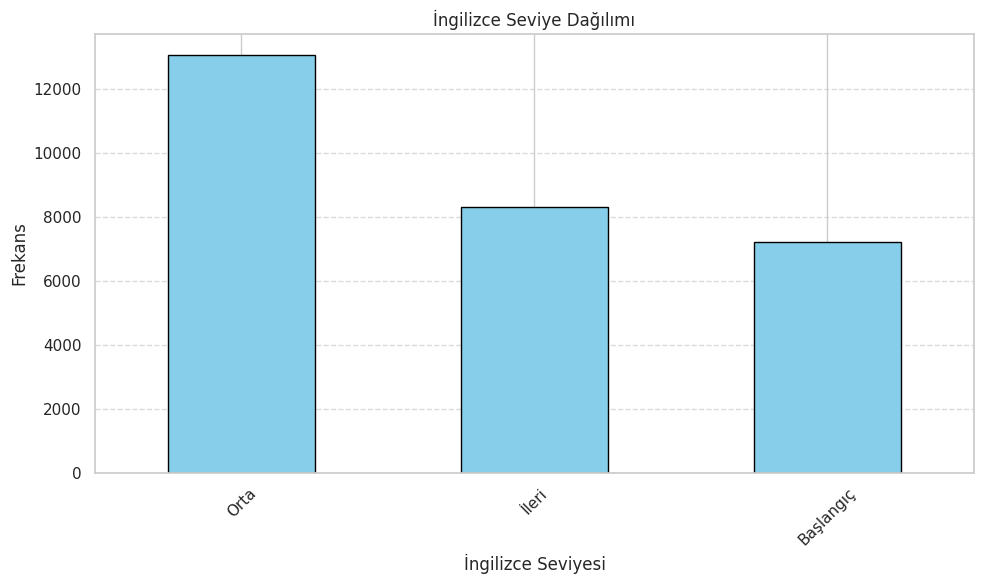

In [156]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
freq.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('İngilizce Seviye Dağılımı')
plt.xlabel('İngilizce Seviyesi')
plt.ylabel('Frekans')

# Grafik gösterimi
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [157]:
df['Ingilizce Biliyor musunuz?'].fillna('Hayır',inplace=True)

/tmp/ipykernel_36/2845694141.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.




# **Girişimcilik Columnu**

In [159]:
df['Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?'].fillna('Hayır',inplace=True)

/tmp/ipykernel_36/1255265188.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.




In [160]:
df['Girisimcilikle Ilgili Deneyiminiz Var Mi?'].unique()

array(['Hayır', 'Evet', nan], dtype=object)

In [162]:
#null degerleri bos string ile doldurdum
df['Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misiniz?'] = df['Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misiniz?'].fillna('')

In [163]:
from sklearn.feature_extraction.text import TfidfVectorizer

#Türkçe durdurma kelimeleri (stop words) listesi
turkish_stop_words = [
    'acaba', 'ama', 'aslında', 'az', 'bazı', 'belki', 'biri', 'birkaç', 'birşey', 'biz', 
    'bu', 'çok', 'çünkü', 'da', 'daha', 'de', 'defa', 'diye', 'eğer', 'en', 'gibi', 
    'hem', 'hep', 'hepsi', 'her', 'hiç', 'için', 'ile', 'ise', 'kez', 'ki', 'kim', 
    'mı', 'mu', 'mü', 'nasıl', 'ne', 'neden', 'nerde', 'nerede', 'nereye', 'niçin', 
    'niye', 'o', 'sanki', 'şayet', 'şey', 'siz', 'şu', 'tüm', 've', 'veya', 'ya', 
    'yani', 'ile'
]

vectorizer = TfidfVectorizer(stop_words=turkish_stop_words)
X = vectorizer.fit_transform(df['Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misiniz?'])

In [164]:
from sklearn.cluster import KMeans

#KMeans modeli (örneğin 3 küme)
kmeans = KMeans(n_clusters=3, random_state=42)

#Modeli TF-IDF vektörlerine fit etme
kmeans.fit(X)

clusters = kmeans.labels_

#Sonuçları veri setine yeni bir sütun olarak ekleme
df['Cluster'] = clusters
print(df)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


       Basvuru Yili  Cinsiyet Ikametgah Sehri  \
0              2023         1          amasya   
1              2023         1           konya   
2              2023         2      Bilinmiyor   
3              2023         2          mardin   
4              2023         2      Bilinmiyor   
...             ...       ...             ...   
65120          2022         2      Bilinmiyor   
65121          2022         2           muğla   
65122          2022         2          mersin   
65123          2022         2          samsun   
65124          2022         1           hatay   

                        Universite Adi Universite Turu  \
0                  munzur universitesi          devlet   
1               hacettepe universitesi          devlet   
2               kapadokya universitesi            özel   
3          mardin artuklu universitesi          devlet   
4                bogazici universitesi          devlet   
...                                ...             ...   
65120

In [165]:
filtered_df = df[df['Cluster'] == 1]
filtered_df['Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misiniz?']

1188     YEA eğitimleri kapsamında çeşitli dersler aldı...
3684     Herhangi bir deneyimim yok ancak gerçekleştirm...
5206     Pratikte yok fakat daha önce Aspire Leaders pr...
7049     bir deneyimim var fakat maddi anlamda yeterli ...
7790     Okuldaki kulüplere katılıyorum birebir fizikse...
8783     Maalesef uygulamaya geçirebildiğim bir girişim...
9645                                                   Yok
10148    Henüz bir deneyimim yok ama girişimcilik eğiti...
10900    Deneyimim yok ancak hakkında makaleler yazmakt...
10320                                                  YOK
14572    Girişimcilik üzerine seminerlere katıldım. Akt...
17371                yok ama ilerde kendi fabrikamı açıcam
17507    Deneyimim Yok Ama Bence Girişimcilik Bir uçuru...
17825    ciddi bir iş konusunda böyle bir tecrübem yok ...
18390    Aslında bizzat yok ama destek olduğum birçok p...
20185    evet girişimcilik kurslarına katıldım ama bir ...
20372                                                  Y

In [166]:
cluster_labels = {0: 'Girişimcilik Deneyimi Yok', 1: 'Orta Düzeyde Tecrübeli', 2: 'Başlangıç Düzeyinde Tecrübeli'}

df['Girisimcilik Duzeyi'] = df['Cluster'].map(cluster_labels)

print(df[['Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misiniz?', 'Cluster', 'Girisimcilik Duzeyi']].head())

  Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misiniz?  Cluster  \
0                                                  -               0   
1                                                  -               0   
2                                                  -               0   
3                                                  -               0   
4  12 aydır, yolculuğuna bir yıl önce başlamış ol...               2   

             Girisimcilik Duzeyi  
0      Girişimcilik Deneyimi Yok  
1      Girişimcilik Deneyimi Yok  
2      Girişimcilik Deneyimi Yok  
3      Girişimcilik Deneyimi Yok  
4  Başlangıç Düzeyinde Tecrübeli  


In [167]:
from sklearn.feature_extraction.text import TfidfVectorizer

#Türkçe durdurma kelimeleri (stop words) listesi
turkish_stop_words = [
    'acaba', 'ama', 'aslında', 'az', 'bazı', 'belki', 'biri', 'birkaç', 'birşey', 'biz', 
    'bu', 'çok', 'çünkü', 'da', 'daha', 'de', 'defa', 'diye', 'eğer', 'en', 'gibi', 
    'hem', 'hep', 'hepsi', 'her', 'hiç', 'için', 'ile', 'ise', 'kez', 'ki', 'kim', 
    'mı', 'mu', 'mü', 'nasıl', 'ne', 'neden', 'nerde', 'nerede', 'nereye', 'niçin', 
    'niye', 'o', 'sanki', 'şayet', 'şey', 'siz', 'şu', 'tüm', 've', 'veya', 'ya', 
    'yani', 'ile'
]

vectorizer = TfidfVectorizer(stop_words=turkish_stop_words)
X = vectorizer.fit_transform(df_test['Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misiniz?'])

from sklearn.cluster import KMeans

#KMeans modeli (örneğin 3 küme)
kmeans = KMeans(n_clusters=3, random_state=42)

#Modeli TF-IDF vektörlerine fit etme
kmeans.fit(X)

clusters = kmeans.labels_

#Sonuçları veri setine yeni bir sütun olarak ekleme
df_test['Cluster'] = clusters
print(df_test)

cluster_labels = {0: 'Girişimcilik Deneyimi Yok', 1: 'Orta Düzeyde Tecrübeli', 2: 'Başlangıç Düzeyinde Tecrübeli'}

df_test['Girisimcilik Duzeyi'] = df_test['Cluster'].map(cluster_labels)

       Basvuru Yili Cinsiyet      Dogum Tarihi Dogum Yeri Ikametgah Sehri  \
0              2023    Kadın  21.06.2002 00:00     Amasya          amasya   
1              2023    Kadın  11.05.2004 00:00      Konya           konya   
2              2023    Erkek  24.04.2002 00:00   İstanbul      Bilinmiyor   
3              2023    Erkek  11.03.2003 00:00     Mardin          mardin   
4              2023    Erkek  26.01.2002 00:00     Samsun      Bilinmiyor   
...             ...      ...               ...        ...             ...   
11044          2023    Kadın   3.01.2002 00:00     Yozgat          ankara   
11045          2023    Kadın   9.09.2001 00:00      Konya           konya   
11046          2023    Erkek   8.06.2004 00:00     Ankara          ankara   
11047          2023    Kadın  16.10.2001 00:00   Adıyaman      Bilinmiyor   
11048          2023    Kadın  22.09.1999 00:00      Niğde          ankara   

                           Universite Adi Universite Turu  \
0             

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


In [168]:
df['Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misiniz?'].isnull().sum()

0

In [169]:
df['Girisimcilikle Ilgili Deneyiminiz Var Mi?'].isnull().sum()

12840

In [171]:
df['Girisimcilikle Ilgili Deneyiminiz Var Mi?'].fillna('Bilinmiyor',inplace=True)

/tmp/ipykernel_36/3221478432.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.




In [172]:
df['Girisimcilikle Ilgili Deneyiminiz Var Mi?'].isnull().sum()

0

In [174]:
df['Ingilizce Seviyeniz?'].fillna('Başlangıç', inplace=True)

/tmp/ipykernel_36/3393016831.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.




# **Anne-Baba**

In [179]:
egitim_mapping = {
    "İlkokul": 1,
    "İLKOKUL MEZUNU": 1,
    "İlkokul Mezunu": 1,
    "Üniversite": 4,
    "ÜNİVERSİTE": 4,
    "Lise": 3,
    "LİSE": 3,
    "Ortaokul": 2,
    "ORTAOKUL MEZUNU": 2,
    "Ortaokul Mezunu": 2,
    "Lise Mezunu": 3,
    "Üniversite Mezunu": 4,
    "Yüksek Lisans": 5,
    "YÜKSEK LİSANS": 5,
    "Yüksek Lisans / Doktora": 5,
    "Doktora": 6,
    "Yüksek Lisans / Doktara":5,
    "DOKTORA": 6,
    "Eğitim Yok": 0,
    "EĞİTİM YOK": 0,
    "Eğitimi yok": 0
}

df["Anne Egitim Durumu"] = df["Anne Egitim Durumu"].replace(egitim_mapping)
df["Baba Egitim Durumu"] = df["Baba Egitim Durumu"].replace(egitim_mapping)

/tmp/ipykernel_36/4266296123.py:25: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


In [180]:
df["Baba Egitim Durumu"] = df["Baba Egitim Durumu"].fillna(0)
df["Baba Egitim Durumu"] = df["Baba Egitim Durumu"].astype(int)
df["Anne Egitim Durumu"] = df["Anne Egitim Durumu"].fillna(0)
df["Anne Egitim Durumu"] = df["Anne Egitim Durumu"].astype(int)

In [183]:
df["Anne Calisma Durumu"] = df["Anne Calisma Durumu"].fillna("Hayır")
df["Baba Calisma Durumu"] = df["Baba Calisma Durumu"].fillna("Hayır")

In [184]:
calisma_map = { "Hayır" : 0, "Evet" : 1, "Emekli" : 2}
df["Anne Calisma Durumu"] = df["Anne Calisma Durumu"].replace(calisma_map)
df["Baba Calisma Durumu"] = df["Baba Calisma Durumu"].replace(calisma_map)

/tmp/ipykernel_36/3079334260.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
/tmp/ipykernel_36/3079334260.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


In [185]:
df[df['Kardes Sayisi']=='Kardeş Sayısı 1 Ek Bilgi Aile Hk. Anne Vefat']
df.loc[df['id'] == 14372, 'Kardes Sayisi'] = '1'

In [186]:
df['Kardes Sayisi'] = pd.to_numeric(df['Kardes Sayisi'],errors='coerce')

In [187]:
df['Kardes Sayisi'].fillna(0,inplace=True)

/tmp/ipykernel_36/2227918514.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.




In [189]:
df['Degerlendirme Puani'] = df['Degerlendirme Puani'].fillna(0)

# **kategorik ve numerik columnlar**

In [190]:
numerical_columns = df.select_dtypes(include=[np.number]).columns

In [191]:
numerical_columns = df.select_dtypes(include=[np.number]).columns
from scipy import stats

for col in numerical_columns:
    stat, p_value = stats.shapiro(df[col].dropna())
    print(f'{col}: Statistics={stat}, p-value={p_value}')
    if p_value > 0.05:
        print(f'{col} - Normal dağılıma uygun')
    else:
        print(f'{col} - Normal dağılıma uygun değil')

Basvuru Yili: Statistics=0.9130802563866254, p-value=1.27522594996429e-102
Basvuru Yili - Normal dağılıma uygun değil
Cinsiyet: Statistics=0.6540017830578182, p-value=6.727728945272915e-142
Cinsiyet - Normal dağılıma uygun değil
Burslu ise Burs Yuzdesi: Statistics=0.40292048488449483, p-value=3.450521415020005e-159
Burslu ise Burs Yuzdesi - Normal dağılıma uygun değil
Burs Aliyor mu?: Statistics=0.4792660957506648, p-value=9.285666572974712e-155
Burs Aliyor mu? - Normal dağılıma uygun değil
Universite Kacinci Sinif: Statistics=0.9247458076410879, p-value=6.786287056525961e-99
Universite Kacinci Sinif - Normal dağılıma uygun değil
Universite Not Ortalamasi: Statistics=0.9134654140115007, p-value=1.6651655274053858e-102
Universite Not Ortalamasi - Normal dağılıma uygun değil
Lise Mezuniyet Notu: Statistics=0.7195028342085487, p-value=1.6234174754557804e-135
Lise Mezuniyet Notu - Normal dağılıma uygun değil
Anne Egitim Durumu: Statistics=0.8817228076117929, p-value=8.050336067141647e-111


/opt/conda/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 76174.


In [192]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

In [193]:
df[categorical_columns] = df[categorical_columns].astype('category')

In [195]:
df_test = df[df["ind"].eq("test")].drop(columns="ind")
df_train = df[df["ind"].eq("train")].drop(columns="ind")

In [196]:
categorical_cols = df_train.select_dtypes(include=['object','category']).columns
#categorical_columns = df_test.select_dtypes(include=['object','category']).
categorical_cols

Index(['Ikametgah Sehri', 'Universite Adi', 'Universite Turu', 'Bölüm',
       'Lise Adi', 'Lise Sehir', 'Lise Turu', 'Lise Bolumu',
       'Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?',
       'Aktif olarak bir STK üyesi misiniz?', 'Stk Projesine Katildiniz Mi?',
       'Girisimcilikle Ilgili Deneyiminiz Var Mi?',
       'Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misiniz?',
       'Ingilizce Biliyor musunuz?', 'Ingilizce Seviyeniz?',
       'Girisimcilik Duzeyi'],
      dtype='object')

In [197]:
categorical_columns = df_test.select_dtypes(include=['object','category']).columns
categorical_columns

Index(['Ikametgah Sehri', 'Universite Adi', 'Universite Turu', 'Bölüm',
       'Lise Adi', 'Lise Sehir', 'Lise Turu', 'Lise Bolumu',
       'Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?',
       'Aktif olarak bir STK üyesi misiniz?', 'Stk Projesine Katildiniz Mi?',
       'Girisimcilikle Ilgili Deneyiminiz Var Mi?',
       'Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misiniz?',
       'Ingilizce Biliyor musunuz?', 'Ingilizce Seviyeniz?',
       'Girisimcilik Duzeyi'],
      dtype='object')

In [198]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}

for column in categorical_cols:
    le = LabelEncoder()
    df_train[column] = df_train[column].astype(str)
    df_train[column] = le.fit_transform(df_train[column])
    label_encoders[column] = le

In [199]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}

for column in categorical_columns:
    le = LabelEncoder()
    df_test[column] = df_test[column].astype(str)
    df_test[column] = le.fit_transform(df_test[column])
    label_encoders[column] = le

In [200]:
# Kategorik sütun kontrolü
print(df_train[categorical_cols].dtypes)
print(df_test[categorical_columns].dtypes)

Ikametgah Sehri                                              int64
Universite Adi                                               int64
Universite Turu                                              int64
Bölüm                                                        int64
Lise Adi                                                     int64
Lise Sehir                                                   int64
Lise Turu                                                    int64
Lise Bolumu                                                  int64
Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?         int64
Aktif olarak bir STK üyesi misiniz?                          int64
Stk Projesine Katildiniz Mi?                                 int64
Girisimcilikle Ilgili Deneyiminiz Var Mi?                    int64
Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misiniz?    int64
Ingilizce Biliyor musunuz?                                   int64
Ingilizce Seviyeniz?                                         i

In [201]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

#train_test_split
X = df_train.drop(columns=['id', 'Degerlendirme Puani'])
y = df_train['Degerlendirme Puani']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#standard scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#model eğitimi - random forest regressor:
model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
#model = RandomForestRegressor()
model.fit(X_train_scaled, y_train)

RandomForestRegressor(max_depth=10, random_state=42)

In [202]:
import math
from sklearn.metrics import mean_squared_error, r2_score

# Test veri seti üzerinde tahminler yapın
y_pred = model.predict(X_test_scaled)

# Performans metriklerini hesaplayın
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# RMSE hesaplayın
rmse = math.sqrt(mse)

# Sonuçları yazdırın
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Square Error: {rmse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 36.852342215783494
Root Mean Square Error: 6.070613001648474
R^2 Score: 0.8884534935254692


In [203]:
X_test = df_test.drop(columns=['id'])

X_train_columns = X_train.columns
X_test = X_test[X_train_columns]  # Bu, X_test'in sadece eğitimde kullanılan özniteliklere sahip olmasını sağlar

X_test_scaled = scaler.transform(X_test)

y_pred = model.predict(X_test_scaled)

# Tahmin sonuçlarını kaydedin
output = pd.DataFrame({'id': df_test['id'], 'Degerlendirme Puani': y_pred})
output.to_csv('predictions.csv', index=False)

print("Tahminler 'predictions.csv' dosyasına kaydedildi.")

Tahminler 'predictions.csv' dosyasına kaydedildi.
